In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv("movie_2015_2020_crew_quotes_.csv.gz")
df_2 = pd.read_csv("movie_data_2015_2020.csv")
df_2["Total Gross"] = pd.to_numeric(df_2["Total Gross"].apply(lambda x:x[1:].replace(",","")))

In [3]:
df_movies = df_2.groupby("tconst").first()
df_movies.sort_values(["Total Gross"],ascending=False)

,Unnamed: 0,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,...,ordering_y,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
tconst,,,,,,,,,,,,,,,,,,,,,
tt2488496,29,movie,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,0.0,2015.0,NaN,138.0,"Action,Adventure,Sci-Fi",tt2488496,...,5.0,nm0009190,director,written by,"[""Poe Dameron""]",J.J. Abrams,1966.0,NaN,"producer,writer,music_department","tt2488496,tt2527338,tt0411008,tt0796366"
tt4154796,48,movie,Avengers: Endgame,Avengers: Endgame,0.0,2019.0,NaN,181.0,"Action,Adventure,Drama",tt4154796,...,4.0,nm1165110,actor,based on the Marvel comics by,"[""Thor""]",Chris Hemsworth,1983.0,2018.0,"actor,producer,soundtrack","tt1735898,tt3501632,tt0848228,tt0796366"
tt1825683,183,movie,Black Panther,Black Panther,0.0,2018.0,NaN,134.0,"Action,Adventure,Sci-Fi",tt1825683,...,1.0,nm1569276,actor,based on the Marvel comics by,"[""T'Challa"",""Black Panther""]",Chadwick Boseman,1976.0,2020.0,"actor,producer,writer","tt4154796,tt3498820,tt4154756,tt1825683"
tt4154756,49,movie,Avengers: Infinity War,Avengers: Infinity War,0.0,2018.0,NaN,149.0,"Action,Adventure,Sci-Fi",tt4154756,...,2.0,nm1165110,actor,based on the Marvel comics by,"[""Thor""]",Chris Hemsworth,1983.0,2018.0,"actor,producer,soundtrack","tt1735898,tt3501632,tt0848228,tt0796366"
tt0369610,4834,movie,Jurassic World,Jurassic World,0.0,2015.0,NaN,124.0,"Action,Adventure,Sci-Fi",tt0369610,...,2.0,nm0397171,actress,screenplay by,"[""Claire""]",Bryce Dallas Howard,1981.0,2008.0,"actress,director,writer","tt1454029,tt0369610,tt1800302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt8963708,1318,movie,And Then We Danced,And Then We Danced,0.0,2019.0,NaN,113.0,"Drama,Romance",tt8963708,...,10.0,nm4141169,production_designer,production designer,"[""Merab""]",Teo Baramidze,1979.0,NaN,"production_designer,art_department,set_decorator","tt8963708,tt6383278,tt2387575,tt2268986"
tt7631792,4489,movie,Follow Me,Follow Me,0.0,2018.0,NaN,80.0,Documentary,tt7631792,...,1.0,nm9417372,director,producer,None,Asri Bendacha,1964.0,NaN,"director,writer,art_director",tt7631792
tt5474666,4115,movie,Extra Ordinary,Extra Ordinary,0.0,2016.0,NaN,95.0,Drama,tt5474666,...,1.0,nm4535105,actress,producer,"[""Mae""]",Katherine Renee Turner,1962.0,NaN,actress,"tt8508462,tt7491982,tt5474666"


In [4]:
df_top_movies = df_movies.iloc[:20]

In [5]:
df_3 = pd.merge(df_1,df_2,how="inner",left_on="speaker",right_on="primaryName")

In [6]:
df_4 = df_3[["date","primaryTitle","Total Gross","Release Date","Year"]]

In [27]:
df_4["Release_date_f"] = df_4["Release Date"]+", "+df_4["Year"].astype(int).astype(str)
df_4["Release_date_f"] = pd.to_datetime(df_4["Release_date_f"])
df_4["date"] = df_4["date"].values.astype('datetime64[D]')
df_4["date_diff"] = (df_4["Release_date_f"] - df_4["date"]).dt.days

/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_48100/461666856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4["Release_date_f"] = df_4["Release Date"]+", "+df_4["Year"].astype(int).astype(str)
/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_48100/461666856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4["Release_date_f"] = pd.to_datetime(df_4["Release_date_f"])
/var/folders/ps/1m_sqz1s639d3_5z340t63h00000gn/T/ipykernel_48100/461666856.py:3: SettingWithCopyWarning: 


In [78]:
df_5 = df_4.groupby(["primaryTitle","date_diff"]).count().reset_index(level=[0,1])[["primaryTitle","date_diff","date"]]
df_5["count"] = df_5["date"]
df_5.head()

,primaryTitle,date_diff,date,count
0,10 Cloverfield Lane,71,6,6
1,10 Cloverfield Lane,72,6,6
2,10 Cloverfield Lane,73,14,14
3,10 Cloverfield Lane,74,6,6
4,10 Cloverfield Lane,75,6,6


(-50.0, 50.0)

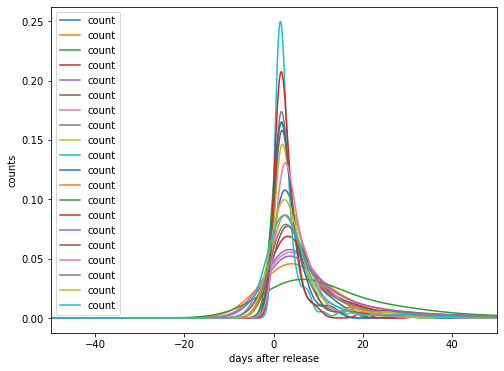

In [90]:
fig, ax = plt.subplots(figsize=(8,6))
df_5[df_5["primaryTitle"].isin(df_top_movies["primaryTitle"])].groupby("primaryTitle").plot(x="date_diff",y="count",kind='kde',subplots=False,ax=ax,l)
plt.ylabel("counts")
plt.xlabel("days after release")
plt.xlim(-50,50)

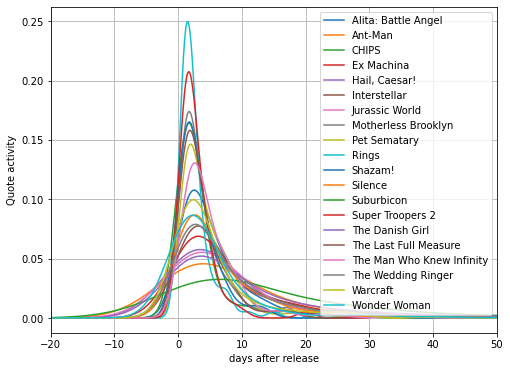

In [101]:
fig, ax = plt.subplots(figsize=(8,6))
for name, group in df_5[df_5["primaryTitle"].isin(df_top_movies["primaryTitle"])].groupby("primaryTitle"):
    group.plot(x="date_diff",y="count",kind='kde',subplots=False,ax=ax,label=name)
plt.xlim(-20,50)
plt.xlabel("days after release")
plt.ylabel("Quote activity")
plt.grid()

In [92]:
plt.show()